In [1]:
# Install kdrcf if running in Google Colab

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !rm -R qmc
    !git clone https://github.com/fagonzalezo/qmc.git
    !mv qmc qmc1
    !mv qmc1/qmc .
else:
    import sys
    sys.path.insert(0, "../")

In [12]:
%matplotlib inline
import numpy as np
import pylab as pl

# Function to visualize a 2D dataset
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Function to visualize the decission surface of a classifier
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 50)
    y_vals = np.linspace(min_y, max_y, 50)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    vals = [[XX[i, j], YY[i, j]] for i in range(grid_r) for j in range(grid_c)]
    preds = pred_fun(np.array(vals))
    ZZ = np.reshape(preds, (grid_r, grid_c))
    print(np.min(preds), np.min(ZZ))
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    CS = pl.contour(XX, YY, ZZ, 100, levels = [0.1*i for i in range(1,10)])
    pl.clabel(CS, inline=1, fontsize=10)
    pl.xlabel("x")
    pl.ylabel("y")

def gen_pred_fun(clf):
    def pred_fun(X):
        return clf.predict(X)[:, 1]
    return pred_fun

### Two moons example

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import qmc.tf.layers as layers
import qmc.tf.models as models


In [14]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

In [15]:
#fm_x = layers.QFeatureMapRFF(dim=1000, gamma=100)
fm_x = layers.QFeatureMapSmp(dim=4, beta=40)
fm_y = layers.QFeatureMapOneHot(num_classes=2)
#fm_y = lambda x: tf.squeeze(tf.keras.backend.one_hot(x, 2))
qmc = models.QMClassifier(fm_x, fm_y, dim_y=2)
out = qmc(X_train)
qmc.compile()
qmc.fit(X_train, y_train, epochs=1)
out = qmc.predict(X_test)
print(out[:10])



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11/11 [==============================] - 0s 1ms/step
[[0.13597032 0.8640296 ]
 [0.11768463 0.8823154 ]
 [0.940132   0.05986806]
 [0.7265857  0.27341437]
 [0.24465768 0.7553421 ]
 [0.90203977 0.09796049]
 [0.7765853  0.22341478]
 [0.13276114 0.8672389 ]
 [0.707395   0.29260507]
 [0.08028866 0.91971135]]


In [16]:
accuracy_score(y_test, out[:,1] >= 0.5)

0.8909090909090909

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
0.0032545219 0.0032545219


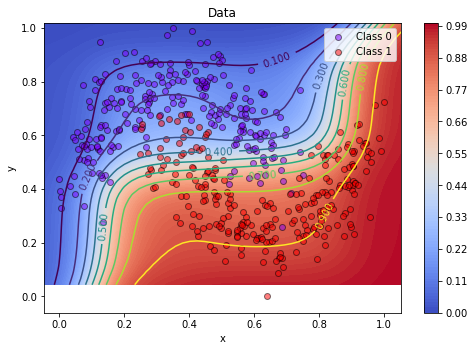

In [17]:
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmc))
plot_data(X, y)

In [18]:
fm_x = layers.QFeatureMapRFF(dim=40, gamma=20, random_state=17)
fm_y = layers.QFeatureMapOneHot(num_classes=2)
qmc = models.QMClassifier(fm_x, fm_y, dim_y=2)
out = qmc(X_train)
qmc.compile()
qmc.fit(X_train, y_train, epochs=1)
out = qmc.predict(X_test)
print(out[:10])



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11/11 [==============================] - 0s 1ms/step
[[0.16524391 0.83475626]
 [0.08653758 0.9134622 ]
 [0.7939245  0.20607542]
 [0.8538762  0.14612365]
 [0.29644868 0.70355135]
 [0.8808138  0.11918616]
 [0.78689086 0.21310896]
 [0.10151131 0.8984887 ]
 [0.5592129  0.44078717]
 [0.08010978 0.91989005]]


0.9333333333333333
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
0.075603545 0.075603545


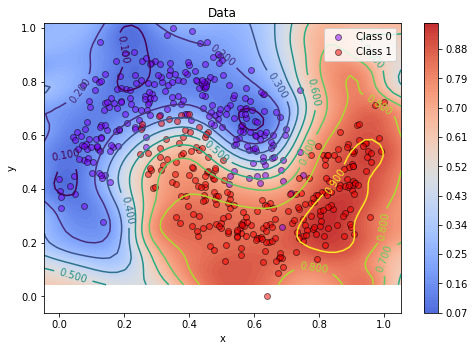

In [20]:
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmc))
plot_data(X, y)